In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the denpendencies

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [2]:
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images , train_labels),(test_image,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 18s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [5]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
print(len(train_images))

60000


In [8]:
print(len(train_labels))

60000


In [9]:
print(len(test_image))

10000


In [10]:
print(train_images[0].shape)

(28, 28)


In [11]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [12]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

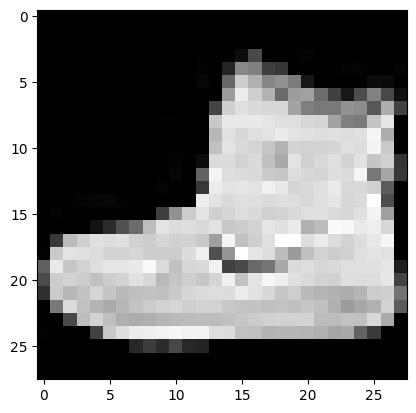

In [13]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [14]:
print(train_labels[0])

9


In [4]:
#Normalize pixel values to between 0 and 1
train_images, test_image = train_images /255.0,test_image/255.0

In [16]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [5]:
#Reshape image to specify that its a single channel(grayscale)
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_image = test_image.reshape((test_image.shape[0],28,28,1))

In [18]:
train_images.shape

(60000, 28, 28, 1)

In [19]:
train_images.shape

(60000, 28, 28, 1)

Convolutional Neural Network


In [6]:
#Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

#Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\krish\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compile and train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [ ]:
# Data augmentation for training
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])

Model Training

In [8]:
# Training with data augmentation
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(10000).batch(32)
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Training the model
history = model.fit(
    train_ds,
    epochs=15,
    validation_data=(test_image, test_labels),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8213 - loss: 0.4899 - val_accuracy: 0.8685 - val_loss: 0.3660
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8848 - loss: 0.3162 - val_accuracy: 0.8836 - val_loss: 0.3233
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9001 - loss: 0.2706 - val_accuracy: 0.8904 - val_loss: 0.3025
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9118 - loss: 0.2390 - val_accuracy: 0.8955 - val_loss: 0.2851
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9215 - loss: 0.2133 - val_accuracy: 0.8982 - val_loss: 0.2826


Model Evalution

In [25]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_image,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8964 - loss: 0.2975

Test accuracy: 0.896399974822998


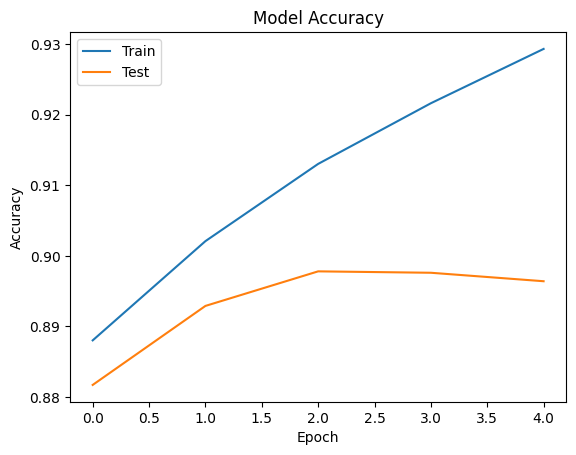

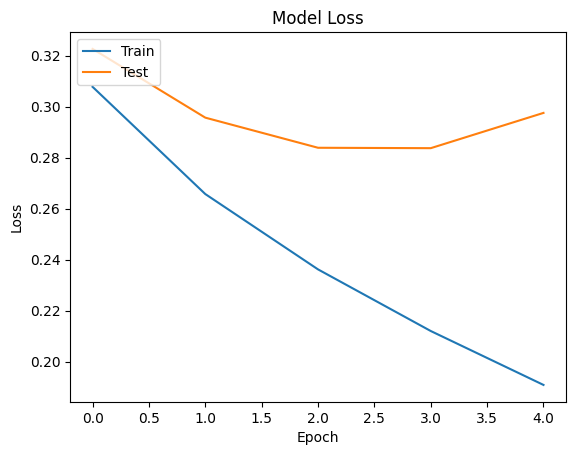

In [27]:
#plot training & Validation accuracy values
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#plot training & validation loss values
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [9]:
model.save('fashion_mnist_model.h5')